In [100]:
import matplotlib.pyplot as plt

Input values - a, b, g, N

In [67]:
b=0.4
g=0.3
a=1-(b+g)
N=5

Function to calculate trust from direct experience: observed agent and other members

In [82]:
def TrustDirect(r_s, b_i):    
    td_list=[]
    n=r_s+b_i
    td_list.append(n)
    l=0.9
    k_suc=0
    k_fail=0
    i=0
    for i in range(1,10):
        if i == 1:
            k_suc=i
            n=round(l*(k_suc-k_fail)/(k_suc+k_fail)+(1-l)*n,4)
            td_list.append(n)
            i+=1

        elif i<=6:  
            k_suc=i
            n=round(l*(k_suc-k_fail)/(k_suc+k_fail)+(1-l)*n,4)
            td_list.append(n)
            i+=1           

        elif i==7:
            k_suc=i-1
            k_fail=1
            n=round(l*(k_suc-k_fail)/(k_suc+k_fail)+(1-l)*n,4)
            td_list.append(n)
            i+=1

        else:
            k_suc=i-1
            n=round(l*(k_suc-k_fail)/(k_suc+k_fail)+(1-l)*n,4)
            td_list.append(n)
            i+=1

    return td_list 

Direct trust of five agents across ten interactions

In [83]:
td_1 = TrustDirect(0.5, 0.001)
td_2 = TrustDirect(-0.2, 0.008)
td_3 = TrustDirect(-0.6, 0.012)
td_4 = TrustDirect(0.2, 0.002)
td_5 = TrustDirect(0.35, 0.011)

Calculate average trust of other agents using direct trust values 

In [90]:
tdj_agents=[td_2, td_3, td_4, td_5]
tdj=[]
for i in range (len(td_2)):
    betweensum=0
    for j in range (len(tdj_agents)):
        betweensum+=tdj_agents[j][i]
    tdj.append(betweensum/(len(tdj_agents)))

Trust values of observed agent over period of interations

In [97]:
t_1=[]
for i in range(1,10):
    t=b*tdj[i-1]+g*td_1[i]
    t_1.append(t)

Calculate cost C(t)

In [98]:
c_1=[]
for i in range (3,8):
    c=t_1[i]**2-2*(b*tdj[i-1]+g*td_1[i])*t_1[i]+b*tdj[i-1]**2+g*td_1[i]**2
    c_1.append(c)

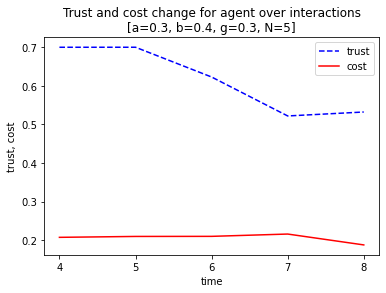

In [101]:
time = ['4','5','6','7','8']
plt.plot(time, t_1[4:9], '--', color="blue", label="trust")
plt.plot(time, c_1, '-', color="red", label="cost")

plt.title("Trust and cost change for agent over interactions\n[a="+str(round(a,1))+", b="+str(b)+", g="+str(g)+", N="+str(N)+"]")
plt.xlabel("time")
plt.ylabel("trust, cost")
plt.legend()
plt.show()